In [1]:
##Classification using Support Vector Machine (SVM)
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import nltk
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
products = pd.read_csv('amazon_baby.csv')
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [3]:
len(products) - len(products.dropna())

1147

In [4]:
len(products)

183531

In [5]:
products = products.dropna()

In [6]:
for i in range(0,len(products)-1):
    if type(products.iloc[i]['review']) != str:
        products.iloc[i]['review'] = str(products.iloc[i]['review'])

In [7]:
products = products[products['rating'] != 3]

In [8]:
def sentiment_pred(n):
    return 1 if n >= 4 else 0
products['sentiment'] = products['rating'].apply(sentiment_pred)
products.head()

,name,review,rating,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,1


In [9]:
scores = products['rating']

In [10]:
print("The mean of output classes in the dataset is:")
print(scores.mean())
print("The standard deviation of the output classes in the dataset is:")
print(scores.std())

The mean of output classes in the dataset is:
4.232033027722283
The standard deviation of the output classes in the dataset is:
1.2960315168252163


In [11]:
# Distribution of the Training Output classes.
products.groupby('sentiment')['review'].count()

sentiment
0     26361
1    139318
Name: review, dtype: int64

<AxesSubplot:title={'center':'Label Distribution'}, xlabel='sentiment'>

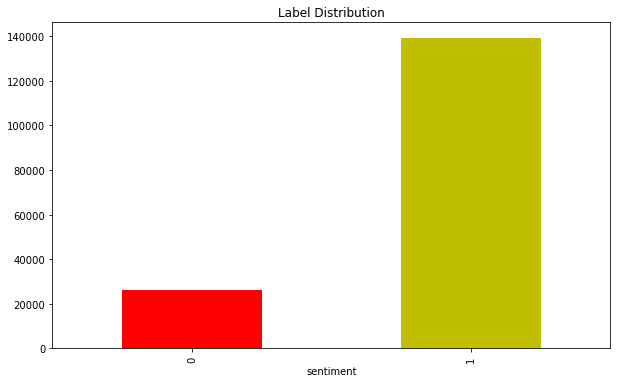

In [12]:
#plotting the sentiment 0 and 1 using a bar graph
products.groupby('sentiment')['review'].count().plot(kind='bar', color= ['r','y'],title='Label Distribution',  figsize = (10,6))

In [13]:
## Pre Processing Steps which uses lemmitizer and stopwords to clean the reviews.
lemmatizer = nltk.WordNetLemmatizer()
stop = stopwords.words('english')
translation = str.maketrans(string.punctuation,' '*len(string.punctuation))

def preprocessing(line):
    tokens=[]
    line = line.translate(translation)
    line = nltk.word_tokenize(line.lower())
    stops = stopwords.words('english')
    stops.remove('not')
    stops.remove('no')
    line = [word for word in line if word not in stops]
    for t in line:
        stemmed = lemmatizer.lemmatize(t)
        tokens.append(stemmed)
    return ' '.join(tokens)

In [14]:
X=products['review']
y=products['sentiment']

In [15]:
### This method actually preprocesses the data.
data = []
for p in products['review']:
    data.append(preprocessing(p))

In [16]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,max_df = 0.7,norm='l2', encoding='latin-1', ngram_range=(1, 2),stop_words='english')

In [17]:
X_tfidf = tfidf.fit_transform(data)

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tfidf, y, test_size=0.1, random_state=0)

In [19]:
#Countvectorizer
#cv = CountVectorizer()
#ctmTr = cv.fit_transform(X_train)
#X_test_dtm = cv.transform(X_test)

In [20]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

#Fit train and test into the model
clf.fit(X_train, Y_train)

LinearSVC()

In [21]:
y_pred_class = clf.predict(X_test)

In [22]:
#Classification report & confusion matrix
print("Confusion Matrix\n",confusion_matrix(Y_test,y_pred_class))
print("\n")
print("Classification Report\n",classification_report(Y_test,y_pred_class))

Confusion Matrix
 [[ 1869   756]
 [  354 13589]]


Classification Report
               precision    recall  f1-score   support

           0       0.84      0.71      0.77      2625
           1       0.95      0.97      0.96     13943

    accuracy                           0.93     16568
   macro avg       0.89      0.84      0.87     16568
weighted avg       0.93      0.93      0.93     16568



In [23]:
print("Accuracy : ",accuracy_score(Y_test,y_pred_class)*100)

Accuracy :  93.30033800096572
